<img src="images/keepcoding.png" width=200 align="left">

# Errores computacionales 

## 1. Introducción


A menudo, cuando implementamos un algoritmo de datos, tenemos que tener en cuenta que hay varias fuentes de error que pueden afectar al error en la salida de nuestro programa:

- Los errores de entrada: error de un instrumento de medida o de nuestra propia percepción
- Los errores de almacenamiento: no podemos almacenar un número infinito de decimales
- Los errores algorítmicos
- Los errores de planteamiento o simplificaciones

Las dos formas usuales de cuantificar un error son:

- **Error absoluto**: que viene dado por la fórmula $\lvert\widetilde{z}-z\rvert$ donde $\widetilde{z}$ es la aproximación de la cantidad $z$.
- **Error relativo**: que viene dado por la fórmula:
$$
\frac{\lvert\widetilde{z}-z\rvert}{\lvert z\rvert}
$$

Solemos usar el error relativo porque nos da una mejor idea de la importancia que tiene el error con respecto a la magnitud. 

Por ejemplo, pensemos que estamos midiendo un objeto pequeño que mide 0.007 cm (por ejemplo, indicado por el fabricante). Si lo hacemos con un instrumento cuyo mínimo es 0.250, no podremos medir nada más pequeño por lo que esa será nuestra aproximación.

In [2]:
# Calculamos el error absoluto cuando z = 0.007 cm y su aproximación es 0.250 cm
def error_absoluto(z_aprox, z):
    return abs(z_aprox - z)
error_absoluto(0.250,0.007)

0.243

In [4]:
# Calculamos el error relativo del ejemplo anterior
def error_relativo(z_aprox, z):
    return abs(z_aprox - z)/abs(z)
error_relativo(0.250,0.007)

34.714285714285715

El resultado anterior nos indica que el error es casi 35 veces más grande que la magnitud (gigantesco). Se suele decir que el error relativo es del 3471.4% !!. Aunque a simple vista 0.25 cm parece un error pequeño, si estamos tratando con magnitudes como 0.007 cm es un error enorme. Usar el error relativo nos permite darnos cuenta de esto.

## 2. Errores de almacenamiento
### 2.1 Definición e inconvenientes

A la hora de almacenar los datos también se producen errores. Ya hemos visto ejemplos de conjuntos como los números racionales y los reales. En ambos, nos encontramos con elementos, como $\pi$ y $1/3$ cuya representación decimal es infinita. 

Sin embargo, la capacidad de almacenamiento de los ordenadores es finita y por tanto solo se puede almacenar una cantidad limitada, por grande que sea. 

Esto significa que ni siquiera somos capaces de almacenar adecuadamente $\pi$ o $1/3$. La alternativa real a este problema es que **cada número se representa con una cantidad máxima de cifras decimales**, lo que produce que solo se guarden de forma exacta los números que no excedan de ese máximo.

Este hecho, a su vez, no solo produce un error inevitable a la hora de almacenar datos, sino que también implica que **hay una cantidad finita de números distintos que pueden almacenarse**. Estos números que pueden almacenarse se denominan números máquina. Expliquémoslo con un ejemplo:

Supongamos que en nuestro ordenador primitivo solo podemos guardar los números con una cifra. Esto quiere decir, que no solo se tendrá que $\pi=3$ (o sea, que $\pi$ se guardaría como el número 3) sino que el conjunto de números que pueden almacenarse es $\{0,1,2,3,4,5,6,7,8,9\}$, y, el resto de números reales, se representará con alguno de ellos. Es decir, nuestro ordenador solo puede guardar diez valores distintos (el cardinal de ese conjunto).

Lo mismo ocurriría si pudiéramos almacenar solo una cifra y una cifra decimal:

In [6]:
# Construimos el conjunto de los números que tienen una cifra entera y una decimal
S = {f'{entero}.{decimal}' for entero in range(10) for decimal in range(10)}
print(len(S))
print(S)

100
{'6.7', '3.4', '0.8', '1.3', '5.1', '1.8', '3.1', '3.3', '8.6', '8.3', '2.6', '5.0', '3.2', '0.1', '2.9', '5.3', '9.8', '6.9', '4.3', '1.6', '2.8', '7.1', '3.0', '7.0', '8.1', '4.8', '1.7', '5.2', '8.5', '7.4', '6.5', '4.6', '6.1', '5.4', '1.0', '2.4', '7.8', '1.9', '3.9', '5.9', '0.4', '9.2', '0.7', '9.7', '3.7', '1.4', '0.9', '6.6', '9.9', '4.7', '5.8', '0.5', '9.3', '4.5', '4.4', '8.2', '4.1', '3.5', '1.1', '1.2', '1.5', '6.0', '8.8', '2.0', '2.2', '8.0', '9.6', '7.3', '0.3', '8.9', '9.1', '7.7', '9.5', '0.6', '5.7', '6.2', '2.5', '8.4', '3.6', '7.5', '3.8', '2.3', '4.9', '0.0', '5.5', '6.8', '0.2', '4.0', '2.1', '5.6', '9.4', '7.6', '7.2', '6.3', '6.4', '2.7', '4.2', '8.7', '7.9', '9.0'}


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]


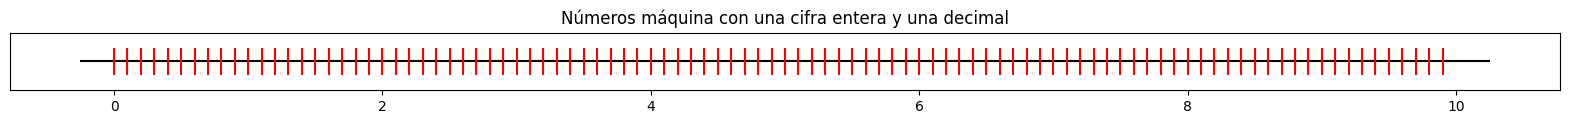

In [7]:
# Mostramos los números que se pueden almacenar
from matplotlib import pyplot as plt

numeros_maquina = [float(n) for n in S]
numeros_maquina.sort()
print(numeros_maquina)

# Inicializar figura
plt.figure(figsize = (20, 0.75))
# Dibujar la recta real
plt.hlines(1, -0.25, 10.25, colors='black')
# Dibujar números máquina
plt.eventplot(numeros_maquina, colors='red', linelengths=0.5)
# Ocultar el eje y
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.title("Números máquina con una cifra entera y una decimal")
plt.show()

Es posible que mientras trabajamos con nuestros datos, necesitemos almacenar un número que no pertenece al conjunto anterior. En ese caso, lo que podríamos hacer es aproximarlo por el valor inmediatamente anterior o posterior.

También ocurre que, aunque estemos trabajando solo con números que pertenecen a nuestro conjunto (es decir, que solo tengan una cifra decimal), el resultado de una operación nos de fuera de ese conjunto. Por ejemplo, 5.5+0.1/4 nos da 5.525, que tiene más de una cifra decimal y ya no podríamos almacenar exactamente. Tendríamos que usar 5.5 de nuevo para almacenar este dato, lo cual dará lugar a más errores si seguimos operando, puesto que se irán propagando.

Pensar que solo podemos almacenar una cifra decimal nos puede parecer irreal, pero el hecho es que por muchas cifras decimales que incluyamos, no vamos a poder llegar a la precisión infinita de la recta real, y en algún momento estaremos en esta misma situación, solo que con un número mayor de cifras decimales. Pero siempre vamos a poder realizar una operación que nos devuelva un resultado con más precisión de la que tenemos y que no vamos a poder almacenar.

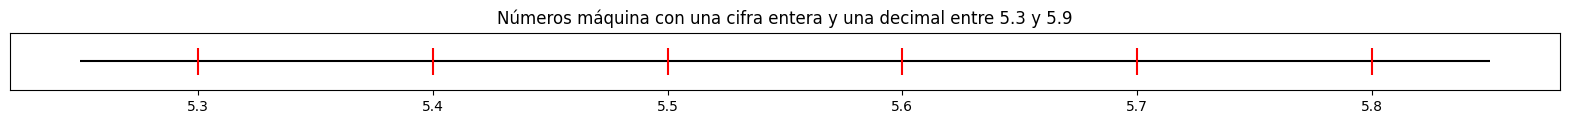

In [8]:
# Mostramos el ejemplo anterior gráficamente
subconjunto_num_maquina = [n for n in numeros_maquina if n>5.2 and n<5.9]

# Creamos la figura
plt.figure(figsize=(20, 0.75))

# Dibujamos la recta real
plt.hlines(1, 5.25, 5.85, colors= 'black')

# Dibujamos los números máquina
plt.eventplot(subconjunto_num_maquina, colors='red', linelengths=0.5)

# Ocultamos el eje y
ax = plt.gca() # get current axes
ax.get_yaxis().set_visible(False)

# Dibujamos el resultado de la operación
plt.title("Números máquina con una cifra entera y una decimal entre 5.3 y 5.9")

plt.show()

### 2.2 Representación binaria

El **sistema binario** es un sistema de numeración en el que los números son representados utilizando únicamente dos cifras: 0 (cero) y 1 (uno). Es uno de los sistemas que se utilizan en las computadoras, debido a que estas trabajan internamente con dos niveles de voltaje (0 apagado, 1 conectado), por lo cual su sistema de numeración natural es el sistema binario. Llamamos bit a cada unidad en este sistema (un 0 o un 1)

Podemos distinguir dos tipos de números decimales en coma flotante (float):
- Precisión simple: utilizan 32 bits para almacenar el valor.
- Doble precisión: utilizan 64 bits para almacenar el valor.

Aunque estas son las principales, también tenemos la precisión media de 16 bits. Cuantos más bits usemos, más precisión tendremos a la hora de almacenar un número.

In [9]:
#Mostramos el mismo número (0.123456789121212121212) con distintas precisiones:
import numpy as np

a = np.array([0.123456789121212121212], dtype=np.float16)
print("16bit: ", a[0])

a = np.array([0.123456789121212121212], dtype=np.float32)
print("32bit: ", a[0])

a = np.array([0.123456789121212121212], dtype=np.float64)
print("64bit: ", a[0])

16bit:  0.1235
32bit:  0.12345679
64bit:  0.12345678912121212


Aunque normalmente no lo vamos a necesitar, también podemos acceder al número binario que se ha guardado internamente:

In [10]:
!pip install bitstring

In [13]:
# Mostramos el mismo número (en negativo y en positivo) en binario con las distintas precisiones:
import bitstring
# 0.123456789121212121212
for longitud in [32, 64]:
    print("Positivo " + str(longitud))
    f1 = bitstring.BitArray(float=0.123456789121212121212, length = longitud)
    print(f1.bin)
    print("Negativo " + str(longitud))
    f1 = bitstring.BitArray(float=-0.123456789121212121212, length = longitud)
    print(f1.bin)

Positivo 32
00111101111111001101011011101010
Negativo 32
10111101111111001101011011101010
Positivo 64
0011111110111111100110101101110100110111101111101010100110001101
Negativo 64
1011111110111111100110101101110100110111101111101010100110001101


En el resultado anterior vemos que **el primer bit se corresponde con el signo del número**.

Tampoco se observa la coma decimal en el número escrito en binario, esto es porque se utiliza **el formato estándar de representación** ([IEEE Storage Format](https://standards.ieee.org/ieee/754/6210/)), en el cual se representan los números como potencias:

- Para el exponente se reservan los dígitos después del bit de signo (los 8 siguientes bits para precisión simple o los 11 siguientes para doble precisión)
- El resto representan la mantisa o significado (los 23 últimos para precisión simple o los 52 últimos para doble precisión). La mantisa o significado son los dígitos significativos del número en notación científica.

Sin embargo, debido a este formato, encontramos que el cero posee dos representaciones binarias posibles: el -0 y el +0

Además, puede ocurrir que **un número con un número finito de cifras decimales posea un número infinito de cifras decimales en su representación binaria**. Por ejemplo, el número decimal 0.1 tiene como representación binaria $0.0\overline{0011}$, lo cual significa que no se podrá almacenar internamente de manera exacta.

In [15]:
# Aunque parece que 0.1 se guarda de forma exacta, vemos que no es así
f = 0.1
print(f)
format(f, '.50g')

0.1


'0.1000000000000000055511151231257827021181583404541'

In [16]:
# Vemos que no pasa lo mismo si el número tiene una representación binaria exacta
f = 1
print(f)
format(f, '.50g')

1


'1'

In [20]:
# Comprobamos la suma 0.1+0.2
print(0.1 + 0.2 == format(0.3, '.50g'))
print(0.1 + 0.2)
print(0.3)
format(0.3, '.50g')

False
0.30000000000000004
0.3


'0.2999999999999999888977697537484345957636833190918'

Por este tipo de cosas se dice que los números _float_ son una _leaky abstraction_. La mayor parte del tiempo nos podemos olvidar que estamos trabajando con ellos, pero a veces no podemos.

### 2.3 Redondeos

Como hemos visto, siempre habrá más números en la recta real (infinitos entre cada par de números) que los que podemos guardar en cualquier máquina, y usando cualquier lenguaje. Cuando se necesita trabajar con estos números no máquina que se encuentran entre dos números máquina, la estrategia es aproximarlos por números máquina cercanos, es decir, redondear.


En coma flotante estándar, para cada número real están definidos cuatro tipos de rendodeo:
- Redondeo a la derecha (o por exceso): se toma el número máquina más cercano a la derecha (mayor) del número real.
- Redondeo a la izquierda (o por defecto): se toma el número máquina más cercano a la izquierda (menor) del número real.
- Redondeo a cero: se toma el número máquina más cercano a la izquierda cuando el número real es positivo y a la derecha cuando es negativo, es decir, se elige entre izquierda y derecha en función del número máquina que se encuentra entre 0 y el número real.
- Redondeo al más próximo: se eligen entre el número máquina que está más cerca del número real, en caso de que estén a igual distancia se toma el que tenga el bit 23 de la mantisa a 0.

La opción más común es esta última, suele ser la opción por defecto en los ordenadores.


In [21]:
round(0.38274298)

0

In [22]:
round(-8.89756)

-9

In [23]:
# Podemos añadir un segundo argumento para el número de cifras significativas
round(-8.89756, 3)

-8.898

In [24]:
# Trunca a un número entero
int(2.999)

2

In [25]:
# El redondeo tiene un impacto en la salida de los algoritmos
import random
random.seed(10870)

valor_real, valor_redondeado = 100, 100

for i in range(100000):
    delta = random.uniform(-0.05, 0.05)
    valor_real = valor_real + delta 
    valor_redondeado = round(valor_redondeado + delta, 3)

print(valor_real)
print(valor_redondeado)

96.05252867123555
96.028


### 2.4 Desbordamiento

El **desbordamiento** (en inglés, "overflow") ocurre cuando el resultado de una operación aritmética excede el rango o la capacidad de representación de los números en el sistema. En otras palabras, el valor resultante es demasiado grande (o, en el caso de números negativos, demasiado pequeño) para ser representado correctamente en el formato de datos disponible. Esto ocurre, de nuevo, porque solo podemos almacenar un número finito de números.

Existen dos tipos comunes de desbordamiento:

- Desbordamiento positivo: Este tipo de desbordamiento ocurre cuando el resultado de una operación aritmética es mayor que el valor máximo que puede ser representado en el formato de datos específico. Por ejemplo, si estamos trabajando con números enteros de 8 bits con signo, el valor máximo que podemos representar es 127. Si sumamos 100 + 50 en este formato, obtenemos 150, lo cual está más allá del rango permitido y causará un desbordamiento positivo.

- Desbordamiento negativo: El desbordamiento negativo ocurre cuando el resultado de una operación es menor que el valor mínimo que puede ser representado en el formato de datos. Utilizando el mismo ejemplo de números enteros de 8 bits con signo, el valor mínimo que podemos representar es -128. Si restamos 150 - 300, el resultado es -150, lo cual está por debajo del rango permitido y causará un desbordamiento negativo.

El desbordamiento es un problema importante en la programación y en el diseño de sistemas digitales, ya que puede llevar a resultados incorrectos y comportamientos impredecibles. Algunas de las consecuencias del desbordamiento pueden incluir:

- Pérdida de información: Cuando ocurre un desbordamiento, los bits más significativos del resultado se "desbordan" o se descartan, lo que puede llevar a la pérdida de información importante en los cálculos.

- Errores en el programa: Si no se maneja adecuadamente, un desbordamiento puede causar que un programa falle o produzca resultados incorrectos. 

- Vulnerabilidades de seguridad: En algunos casos, los desbordamientos pueden ser explotados por atacantes para corromper la memoria de un programa o ejecutar código malicioso.

Para evitar el desbordamiento, es importante elegir el tipo de datos adecuado para representar números en una aplicación y realizar comprobaciones o ajustes necesarios en el código para prevenir resultados fuera de rango. También, en el caso de representaciones de punto flotante, es importante tener en cuenta los límites de precisión y el redondeo.

In [27]:
# Miramos cuál es el valor máximo y mínimo del sistema
# Nos fijamos en los exponentes
import sys
print('\n'.join(str(sys.float_info).split(',')))

sys.float_info(max=1.7976931348623157e+308
 max_exp=1024
 max_10_exp=308
 min=2.2250738585072014e-308
 min_exp=-1021
 min_10_exp=-307
 dig=15
 mant_dig=53
 epsilon=2.220446049250313e-16
 radix=2
 rounds=1)


In [29]:
# Vemos qué valor le asigna si le damos un número mayor o menor:
print(1.8e+308)

inf


In [31]:
#Intentamos operar con estos números
a = 1.8e+308
a/100

inf

### 2.5 Propagación del error

La propagación de los errores de redondeo ocurre debido a que, como hemos visto, los números en punto flotante son aproximaciones de los números reales, y estas aproximaciones pueden tener errores. A medida que se realizan más cálculos con estos números aproximados, los errores se acumulan y pueden llevar a resultados inexactos. Algunos de los factores que contribuyen a la propagación del error de redondeo incluyen la pérdida de cifras significativas y el redondeo.

La propagación del error de redondeo se vuelve más evidente cuando se realizan cálculos más complejos o al aplicar algoritmos en ciencia de datos que involucran muchas operaciones. Por ejemplo, en cálculos estadísticos, la acumulación de errores de redondeo puede afectar la precisión de los resultados finales, lo que a su vez puede tener un impacto en la toma de decisiones basada en datos.

Para minimizar la propagación del error de redondeo en algoritmos de ciencia de datos, es importante considerar el diseño del algoritmo, la elección de tipos de datos y representaciones numéricas, y, en algunos casos, el uso de técnicas de redondeo adecuadas. También se pueden utilizar bibliotecas y herramientas que proporcionen aritmética de alta precisión para reducir el impacto de la propagación del error de redondeo en cálculos críticos.

Veamos un ejemplo sencillo para ilustrar la propagación del error de redondeo:

Supongamos que tenemos dos números en punto flotante, a y b, que son aproximaciones de los números reales.

Si realizamos una simple operación de suma:

c = a + b

El resultado debería ser 0.3, ya que 0.1 + 0.2 es igual a 0.3 en matemáticas. Sin embargo, debido a la limitación de precisión en la representación de punto flotante, c podría no ser exactamente igual a 0.3. El error de redondeo introducido en a y b se propaga a c.

In [32]:
# Representación en punto flotante de 1/10
a = 0.1
# Representación en punto flotante de 2/10
b = 0.2

print(a)
print(b)

0.1
0.2


In [34]:
c = a + b
c

0.30000000000000004

### 2.6 Estabilidad y condicionamiento

En el subcampo matemático del análisis numérico, la **estabilidad numérica** es una propiedad de los algoritmos numéricos. Describe cómo los errores en los datos de entrada se propagan a través del algoritmo. En un método estable, los errores debidos a las aproximaciones se atenúan a medida que la computación procede. En un método inestable, cualquier error en el procesamiento se magnifica conforme el cálculo procede. Métodos inestables generan rápidamente anomalías y son inútiles para el procesamiento numérico.

Un problema está **bien condicionado** si pequeñas variaciones en sus datos de entrada provocan pequeñas variaciones en la solución, y **mal condicionado** si las mismas condiciones provocan grandes variaciones en la solución.

El **número de condición** de una función respecto de su argumento mide cuánto se modifica el valor de salida si se realiza un pequeño cambio en el valor de entrada. Es decir, cuánto cambia  y=f(x) si se modifica x. El número de condición se utiliza para medir cuán sensible resulta una función a cambios o errores en el valor de entrada, y cuál será el error en el valor de salida debido a este.

Cuando estamos trabajando con **métodos iterativos** como los de machine learning, la estabilidad es muy importante porque vamos a realizar las mismas operaciones muchas veces.

In [36]:
import math

# Número de entrada
x = 0.001 # Un número cercano a cero

# Calcular la raíz cuadrada
sqrt_x = math.sqrt(x)

# Calcular una pequeña perturbación en el número de entrada
x_p = x + 1e-5 # 0.00001

# Calcular la raíz cuadrada de la versión perturbada
sqrt_x_p = math.sqrt(x_p)

# Calcular el error relativo en la solución

print("Raíz cuadrada de x: ", sqrt_x)
print("Raíz cuadrada de x perturbado: ", sqrt_x_p)
print("Error relativo: ", error_relativo(sqrt_x_p, sqrt_x))

Raíz cuadrada de x:  0.03162277660168379
Raíz cuadrada de x perturbado:  0.03178049716414141
Error relativo:  0.004987562112089085


In [38]:
# Matrices de entrada
M1 = np.array([[7, 2], [1, 0.28]])
M2 = np.array([[7, 2], [1, 0.285]])
print("Matriz del problema")
print(M1)
print("Matriz perturbada")
print(M2)
print("Término independiente")
b = np.array([6, 2])
print(b)
# Resolución del sistema
print("Solución del sistema no perturbado")
print(np.linalg.solve(M1, b))
print("Solución del sistema perturbado")
print(np.linalg.solve(M2, b))

Matriz del problema
[[7.   2.  ]
 [1.   0.28]]
Matriz perturbada
[[7.    2.   ]
 [1.    0.285]]
Término independiente
[6 2]
Solución del sistema no perturbado
[  58. -200.]
Solución del sistema perturbado
[  458. -1600.]


<img src="images/Double-compound-pendulum.gif" width=200 align="center">

## 3. En resumen, ¿qué podemos hacer?

Lo más importante es analizar el problema que tenemos delante, puesto que es posible que no necesitemos una precisión mayor que la que tenemos. Una vez hecho este análisis, podemos aplicar algunas de estas formas de abordar el problema:

- **Utilizar tipos de datos de alta precisión**: En muchos lenguajes de programación, podemos utilizar tipos de datos de alta precisión, como decimal en Python o BigDecimal en Java, en lugar de tipos de datos de punto flotante estándar. Estos tipos de datos ofrecen mayor precisión y reducen el impacto de los errores de redondeo, pero a menudo son más lentos en términos de rendimiento.

- **Redondeo controlado**: En lugar de utilizar el redondeo predeterminado proporcionado por la máquina, podemos controlar el redondeo explícitamente en tus cálculos. Esto nos permite ajustar el redondeo según las necesidades de la aplicación, lo que puede ayudar a reducir errores acumulativos.

- **Escalado de datos**: Escalar los datos antes de realizar cálculos puede ayudar a evitar errores de desbordamiento y subdesbordamiento. Por ejemplo, si estamos trabajando con números muy pequeños, podríamos escalarlos multiplicando por una constante para llevarlos a un rango más manejable.

- **Evitar sustracción de números cercanos**: La sustracción de números cercanos puede llevar a errores de cancelación, donde los dígitos significativos se cancelan entre sí. En su lugar, podemos reformular loss cálculos para evitar la sustracción de números que son casi iguales.

- **Utilizar bibliotecas de alta precisión**: Estas bibliotecas a menudo implementan algoritmos avanzados para minimizar errores y ofrecen mayor control sobre el redondeo y la precisión.

- **Optimización de algoritmos**: Algunas veces, la optimización de algoritmos puede ayudar a reducir el impacto de los errores de redondeo. Al elegir algoritmos numéricos más estables y eficientes, puedes mejorar la precisión y el rendimiento de tus cálculos.

- **Validación de resultados**: Siempre es importante validar los resultados y realizar pruebas de sensibilidad. 

Vemos algunos ejemplos de redondeo e igualdad de números:

In [39]:
# Si redondeamos 0.1 y 0.2, no podemos igualar a 0.3
round(0.1, 1) + round(0.2, 1) == round(0.3, 1)

False

In [40]:
round(0.1, 1)

0.1

In [41]:
round(0.2, 1)

0.2

In [42]:
round(0.3, 1)

0.3

In [43]:
# Sin embargo, podría servirnos si aproximamos los resultados de las operacioness
round(0.1 + 0.2, 1) == round(0.3, 1)

True

In [44]:
format(0.3, '.50g')

'0.2999999999999999888977697537484345957636833190918'

In [45]:
# Para comparar números podemos usar la función isclose()
from math import isclose
isclose(0.1 + 0.2, 0.3)

True

In [46]:
# Tolerancia relativa de 1e-20
isclose(0.1 + 0.2, 0.3, rel_tol = 1e-20)

False

En `numpy` existen alternativas a la función `isclose` de la librería math:

In [48]:
# El valor por defecto de la tolerancia relativa es de 1e-05  y de la absoluta 1e-08
np.isclose([0.1 + 0.2, 1e-7], [0.3, 1e-8])

array([ True, False])

La libería `decimal` puede almacenar valores decimales con tanta precisión como necesites. Por defecto, garantiza la exactitud de 28 cifras significativas, pero es completamente editable. Se suele utilizar a la hora de trabajar con dinero o tipos de interés.

In [49]:
#Evaluamos la suma 0.1 + 0.2
from decimal import Decimal

Decimal("0.1") + Decimal("0.2")

Decimal('0.3')

In [50]:
#También te permite calcular la raíz cuadrada
Decimal(2).sqrt()

Decimal('1.414213562373095048801688724')

In [58]:
#Calculamos el cuadrado de la raíz de dos
print((2**0.5)**2)
print((Decimal(2)**Decimal('0.5'))**Decimal(2))

2.0000000000000004
1.999999999999999999999999999


La librería `fractions` permite almacenar números decimales de forma exacta:

In [54]:
#Resolvemos el problema de 0.1 + 0.2 con Fraction
from fractions import Fraction
Fraction(1, 10)

Fraction(1, 10)

In [55]:
Fraction(1, 10) + Fraction(2, 10) == Fraction(3, 10)

True

In [56]:
# Simplifica automáticamente las fracciones
Fraction(16, -10)

Fraction(-8, 5)

In [57]:
#Incluso transforma números decimales
Fraction('-0.1')

Fraction(-1, 10)